Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



The following are the steps I took to clean the data. First, I mapped the '$' signs in the price columns to integers so that I could use them in my dataset. I realized that the rows with review and rating values equal to 0 were overlapping, so I dropped all those rows. I left the 0 values in the price data because they still represented some value in the remaining columns. The data coming from an API probably did not have any duplicates, but I checked for them. I also checked the data types and whether there were any missing values.

In [ ]:
df_citybike = pd.read_csv('/home/t0si/Statistical_Modelling_Project/data/citybike_data.csv')
df_yelp = pd.read_csv('/home/t0si/Statistical_Modelling_Project/data/yelp_data.csv')

merged_df = pd.merge(df_yelp, df_citybike, left_on='station_id', right_on='uid', how='inner')

In [ ]:
# Map the price column to integers
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
merged_df['price'] = merged_df['price'].map(price_mapping).fillna(0).astype(int)

In [35]:
# Create boolean masks for rows where 'rating' and 'review_count' are 0
rating_zero_mask = merged_df['rating'] == 0
review_count_zero_mask = merged_df['review_count'] == 0

# Check if the rows are identical
same_rows = (rating_zero_mask == review_count_zero_mask).all()

# Count the overlap (rows where both are 0)
overlap_count = (rating_zero_mask & review_count_zero_mask).sum()

# Print results
print(f"Are the rows where 'rating' is 0 the same as those where 'review_count' is 0? {same_rows}")
print(f"Number of rows where both 'rating' and 'review_count' are 0: {overlap_count}")



Are the rows where 'rating' is 0 the same as those where 'review_count' is 0? True
Number of rows where both 'rating' and 'review_count' are 0: 581


In [36]:
#drop all the columns that have 0 rating and review_count
merged_df = merged_df[~(rating_zero_mask & review_count_zero_mask)]


In [37]:
#check data types
print("Data Types")
print(merged_df.dtypes)
print("")
#check for missing values
print("Is Null")
print(merged_df.isnull().sum())
print("")
#check and count 0 values in all columns
print("Count of 0 values")
print((merged_df == 0).sum())
print("")
#check for duplicates
print("Duplicates")
print(merged_df.duplicated().sum())
print("")


Data Types
station_id        int64
name             object
category         object
distance          int64
rating          float64
review_count      int64
price             int64
latitude        float64
longitude       float64
free_bikes        int64
dtype: object

Is Null
station_id      0
name            0
category        0
distance        0
rating          0
review_count    0
price           0
latitude        0
longitude       0
free_bikes      0
dtype: int64

Count of 0 values
station_id        0
name              0
category          0
distance          0
rating            0
review_count      0
price           309
latitude          0
longitude         0
free_bikes      148
dtype: int64

Duplicates
0



In [ ]:
#save merged data to the original file
merged_df.to_csv('/home/t0si/Statistical_Modelling_Project/data/merged_data.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

I Checked for outliers with the z-score method and removed them.

In [51]:

# Specify the columns for Z-score calculation
columns_to_check = ['distance', 'rating', 'review_count', 'price', 'free_bikes']

# Calculate Z-scores only for the selected columns
z_scores = np.abs((merged_df[columns_to_check] - merged_df[columns_to_check].mean()) / merged_df[columns_to_check].std())

# Set a threshold for identifying outliers (e.g., 3.0)
outliers = (z_scores > 3).any(axis=1)

# Filter out the rows with outliers
df_no_outliers = merged_df[~outliers]

# Print the number of outliers detected and remaining rows
print(f"Number of outliers detected: {outliers.sum()}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

Number of outliers detected: 50
Number of rows after removing outliers: 1194


In [58]:
df_no_outliers.to_csv('/home/t0si/Statistical_Modelling_Project/data/merged_data_no_outliers.csv', index=False)

Count of Businesses by Price Level (Within 50m, Excluding Price = 0):
   price  count
2      1     18
0      2     40
1      3     22
3      4      3


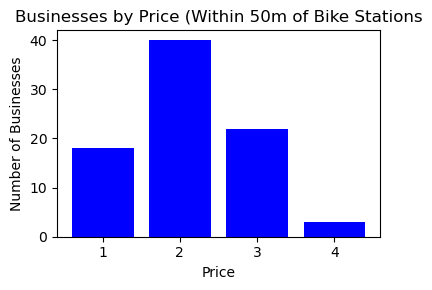

In [53]:

# Filter businesses within 50 meters from bike stations and exclude price = 0
businesses_within_50m = df_no_outliers[(df_no_outliers['distance'] <= 50) & (df_no_outliers['price'] > 0)]

# Group by price and count businesses
price_counts = businesses_within_50m['price'].value_counts().reset_index()
price_counts.columns = ['price', 'count']
price_counts = price_counts.sort_values(by='price')

# Display the result
print("Count of Businesses by Price Level (Within 50m, Excluding Price = 0):")
print(price_counts)

# Plot the data
plt.figure(figsize=(4, 3))
plt.bar(price_counts['price'], price_counts['count'], color='blue')
plt.title('Businesses by Price (Within 50m of Bike Stations')
plt.xlabel('Price')
plt.ylabel('Number of Businesses')
plt.xticks(price_counts['price'])
plt.tight_layout()
plt.savefig('/home/t0si/business_by_price.png', format='png', dpi=300)  # Specify the filename, format, and resolution
plt.show()

/tmp/ipykernel_6958/100158100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='price', y='rating', palette='coolwarm')


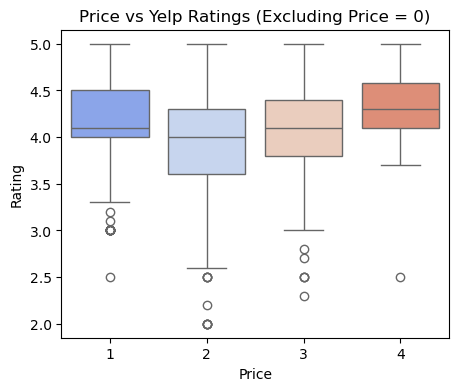

In [54]:
filtered_df = df_no_outliers[df_no_outliers['price']> 0]
plt.figure(figsize=(5, 4))
sns.boxplot(data=filtered_df, x='price', y='rating', palette='coolwarm')
plt.title('Price vs Yelp Ratings (Excluding Price = 0)')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.savefig('/home/t0si/price_yelp_ratings.png', format='png', dpi=300)  
plt.show()

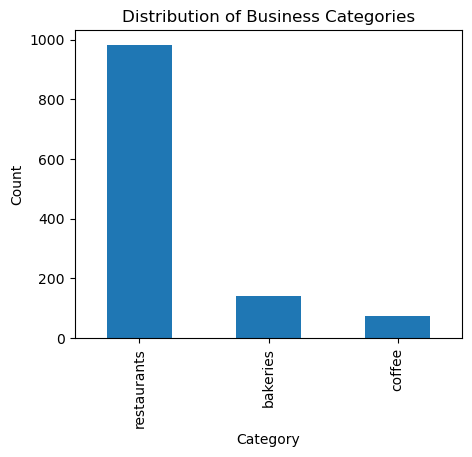

In [55]:
plt.figure(figsize=(5, 4))
df_no_outliers['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Business Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.savefig('/home/t0si/distribution_of_business.png', format='png', dpi=300)  # Specify the filename, format, and resolution
plt.show()

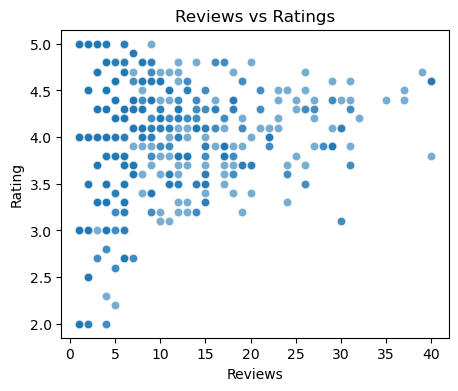

In [56]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df_no_outliers, x='review_count', y='rating', alpha=0.6)
plt.title('Reviews vs Ratings')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('/home/t0si/reviews_vs_ratings.png', format='png', dpi=300)  # Specify the filename, format, and resolution
plt.show()



Median distance from businesses to bike stations: 149.50 km


<function matplotlib.pyplot.show(close=None, block=None)>

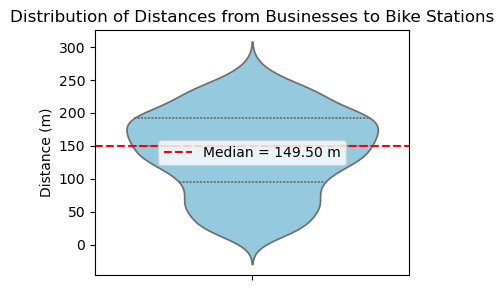

In [57]:
# Calculate the median distance
df_no_outliers = pd.read_csv('/home/t0si/Statistical_Modelling_Project/data/merged_data.csv')
median_distance = df_no_outliers['distance'].median()
print(f"Median distance from businesses to bike stations: {median_distance:.2f} km")

# Plot the distribution of distances
plt.figure(figsize=(4, 3))
sns.violinplot(data=merged_df, y='distance', color='skyblue', inner='quartile')
plt.axhline(median_distance, color='red', linestyle='--', label=f'Median = {median_distance:.2f} m')
plt.title('Distribution of Distances from Businesses to Bike Stations')
plt.ylabel('Distance (m)')
plt.legend()
plt.tight_layout()
plt.show

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [32]:
from sqlalchemy import create_engine, Column, String, Float, Integer, ForeignKey
from sqlalchemy.orm import declarative_base, relationship, sessionmaker
import pandas as pd

# Define the base
Base = declarative_base()

# Define CityBike table
class CityBike(Base):
    __tablename__ = 'citybike'
    __table_args__ = {'extend_existing': True}  

    uid = Column(String, primary_key=True)
    latitude = Column(Float, nullable=False)
    longitude = Column(Float, nullable=False)
    free_bikes = Column(Integer, nullable=True)

    yelp_data = relationship("Yelp", back_populates="citybike_station")
    foursquare_data = relationship("Foursquare", back_populates="citybike_station")

# Define Yelp table
class Yelp(Base):
    __tablename__ = 'yelp'
    __table_args__ = {'extend_existing': True}  # 

    id = Column(Integer, primary_key=True, autoincrement=True)  
    station_id = Column(String, ForeignKey('citybike.uid'), nullable=False)
    name = Column(String, nullable=False)
    category = Column(String, nullable=True)
    distance = Column(Float, nullable=True)
    rating = Column(Float, nullable=True)
    review_count = Column(Integer, nullable=True)
    price = Column(Integer, nullable=True)

    citybike_station = relationship("CityBike", back_populates="yelp_data")

# Define Foursquare table
class Foursquare(Base):
    __tablename__ = 'foursquare'
    __table_args__ = {'extend_existing': True}  
    
    id = Column(Integer, primary_key=True, autoincrement=True)  
    station_id = Column(String, ForeignKey('citybike.uid'), nullable=False)
    name = Column(String, nullable=False)
    distance = Column(Float, nullable=True)
    rating = Column(Float, nullable=True)
    popularity = Column(Float, nullable=True)
    price = Column(Integer, nullable=True)
    hours = Column(String, nullable=True)
    hours_popular = Column(String, nullable=True)
    category = Column(String, nullable=True)

    citybike_station = relationship("CityBike", back_populates="foursquare_data")

# Initialize SQLite database
engine = create_engine('sqlite:///citybike_db.sqlite', echo=True)
Base.metadata.create_all(engine)

# Create a session
Session = sessionmaker(bind=engine)
session = Session()

# Load data from CSV files
citybike_df = pd.read_csv('/home/t0si/Statistical_Modelling_Project/data/citybike_data.csv')  
yelp_df = pd.read_csv('/home/t0si/Statistical_Modelling_Project/data/yelp_data.csv')  
foursquare_df = pd.read_csv('/home/t0si/Statistical_Modelling_Project/data/foursquare_data.csv')  

# Insert CityBike data
for _, row in citybike_df.iterrows():
    session.add(CityBike(
        uid=row['uid'],
        latitude=row['latitude'],
        longitude=row['longitude'],
        free_bikes=row.get('free_bikes', None)
    ))

# Insert Yelp data
for _, row in yelp_df.iterrows():
    session.add(Yelp(
        station_id=row['station_id'],
        name=row['name'],
        category=row['category'],
        distance=row.get('distance', None),
        rating=row.get('rating', None),
        review_count=row.get('review_count', None),
        price=row.get('price', None)
    ))

# Insert Foursquare data
for _, row in foursquare_df.iterrows():
    session.add(Foursquare(
        station_id=row['station_id'],
        name=row['name'],
        distance=row.get('distance', None),
        rating=row.get('rating', None),
        popularity=row.get('popularity', None),
        price=row.get('price', None),
        hours=row.get('hours', None),
        hours_popular=row.get('hours_popular', None),
        category=row.get('category', 'Unknown')
    ))



# Commit the session
try:
    session.commit()
    print("Data successfully inserted into the database.")
except Exception as e:
    session.rollback()
    print(f"An error occurred: {e}")
finally:
    session.close()



2024-11-19 21:47:27,181 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-19 21:47:27,181 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("citybike")
2024-11-19 21:47:27,181 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-19 21:47:27,182 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("citybike")
2024-11-19 21:47:27,182 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-19 21:47:27,182 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("yelp")
2024-11-19 21:47:27,183 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-19 21:47:27,183 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("yelp")
2024-11-19 21:47:27,183 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-19 21:47:27,184 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("foursquare")
2024-11-19 21:47:27,184 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-19 21:47:27,184 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("foursquare")
2024-11-19 21:47:27,184 INFO sqlalchemy.engine.Engine [raw sql] 

Look at the data before and after the join to validate your data.

Data successfully inserted into the database.